In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from skimage.transform import resize
from cropLettersFromImage import getWords
import matplotlib.pyplot as plt
from skimage.io import imread
import pandas as pd
import numpy as np
import os, pickle

In [2]:
target = []
flat_data = []
DataDirectory = './DataSet/'

Categories = os.listdir(DataDirectory)

for index, i in enumerate(Categories):
    print(i, '-> ', str(round(100*(index + 1)/len(Categories))) + '%')
    target_class = index
    path = os.path.join(DataDirectory,i)
    for img in os.listdir(path):
        img_array = imread(os.path.join(path,img))
        img_resized = resize(img_array,(40,40,3))
        flat_data.append(img_resized.flatten())
        target.append(target_class)

flat_data = np.array(flat_data)
target = np.array(target)

2 ->  3%
3 ->  7%
4 ->  10%
5 ->  13%
6 ->  17%
7 ->  20%
8 ->  23%
9 ->  27%
a ->  30%
b ->  33%
c ->  37%
d ->  40%
e ->  43%
f ->  47%
g ->  50%
h ->  53%
k ->  57%
m ->  60%
n ->  63%
p ->  67%
q ->  70%
r ->  73%
s ->  77%
t ->  80%
u ->  83%
v ->  87%
w ->  90%
x ->  93%
y ->  97%
z ->  100%


In [3]:
df = pd.DataFrame(flat_data)
df['Target'] = target

In [4]:
x = df.iloc[:,:-1].values
y = target

print("Input data dimensions:",x.shape)
print("Output data dimensions:",y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle = True, test_size = 0.2, random_state = 109, stratify = y)

print("Dimensions of input training data:",x_train.shape)
print("Dimensions of input testing data:",x_test.shape)
print("Dimensions of output training data:",y_train.shape)
print("Dimensions of output testing data:",y_test.shape)

Input data dimensions: (7135, 4800)
Output data dimensions: (7135,)
Dimensions of input training data: (5708, 4800)
Dimensions of input testing data: (1427, 4800)
Dimensions of output training data: (5708,)
Dimensions of output testing data: (1427,)


In [5]:
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [6]:
filename = 'finalized_model.sav'
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [7]:
y_pred = knn.predict(x_test)
print(y_test)
print(y_pred)
ac = accuracy_score(y_test,y_pred)
print(ac)

[ 2 15 23 ...  9 12 13]
[ 2 15 23 ...  9 12 13]
0.9677645409950946


In [28]:
def getCaptchaText(Captcha):
    plt.imshow(plt.imread(Captcha))
    plt.show()
    clusters = getWords(Captcha)
    text = ''

    # Create a figure with subplots to display all images together
    n_clusters = len(clusters)
    cols = 5  # Number of columns in the grid
    rows = (n_clusters + cols - 1) // cols  # Calculate rows needed

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 1, rows * 1))
    axes = axes.flatten()  # Flatten to easily iterate over axes

    for i, image in enumerate(clusters):
        flat_data = []
        img_resized = resize(image, (40, 40, 3))
        flat_data.append(img_resized.flatten())
        flat_data = np.array(flat_data)
        y_output = loaded_model.predict(flat_data)
        
        axes[i].imshow(img_resized, cmap='gray')
        axes[i].set_title(Categories[y_output[0]].replace('upper', '').replace('lower', ''))
        axes[i].axis('off')  # Remove axes for a cleaner look
        text += Categories[y_output[0]].replace('upper', '').replace('lower', '')

    # Hide any unused subplots
    for j in range(len(clusters), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()  # Show all images in one figure
    return text


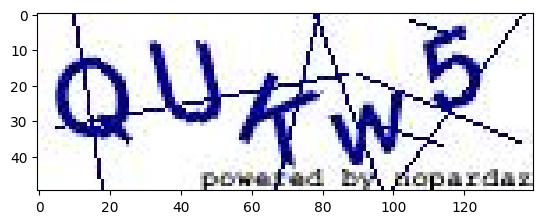

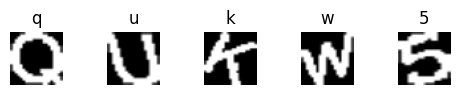

Predicted Text Is: qukw5


In [29]:
Captcha = './Golestan-Captchas/69310.gif'
text = getCaptchaText(Captcha)
print("Predicted Text Is:", text)